In [1]:
import nest_asyncio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import CubicSpline
from tastytrade import Account, Session, DXLinkStreamer
from config import *
from methods import *
from datetime import datetime, timedelta, time
import asyncio
from zoneinfo import ZoneInfo
from curl_cffi import requests as yfrequests
yfsession = yfrequests.Session(impersonate="safari")
nest_asyncio.apply()

In [2]:
session=None
account=None

async def setup():
    global session, account, config
    # setup
    config = Config(test=False)
    session = Session(config.username, config.password, is_test=config.test)
    account = await Account.a_get(session, config.account_number)

asyncio.run(setup())
print("Session and account setup complete.")

streamer = DXLinkStreamer(session) #async streamer

nytime = datetime.now(ZoneInfo("America/New_York"))

Session and account setup complete.


In [3]:
# how to fetch an option chain
chain = OptionMethods.get_current_chain(session, 'SPY', dte=5)

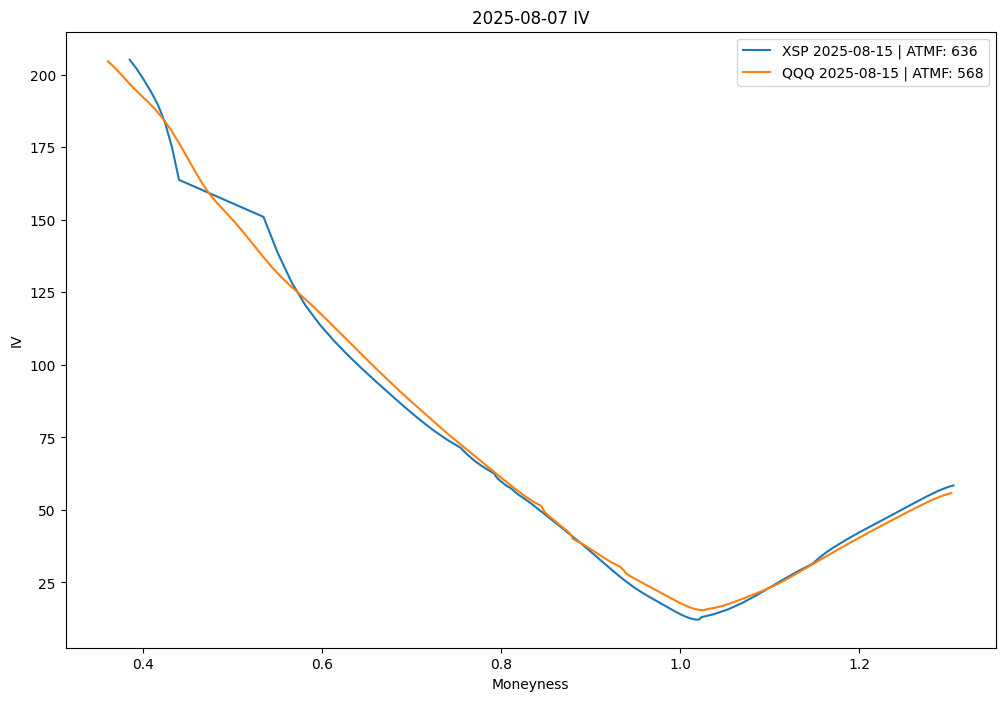

In [4]:
fig = OptionMethods.plot_iv(session, 'XSP', pd.to_datetime('2025-08-15'), moneyness=True)
fig = OptionMethods.plot_iv(session, 'QQQ', pd.to_datetime('2025-08-15'), fig=fig)

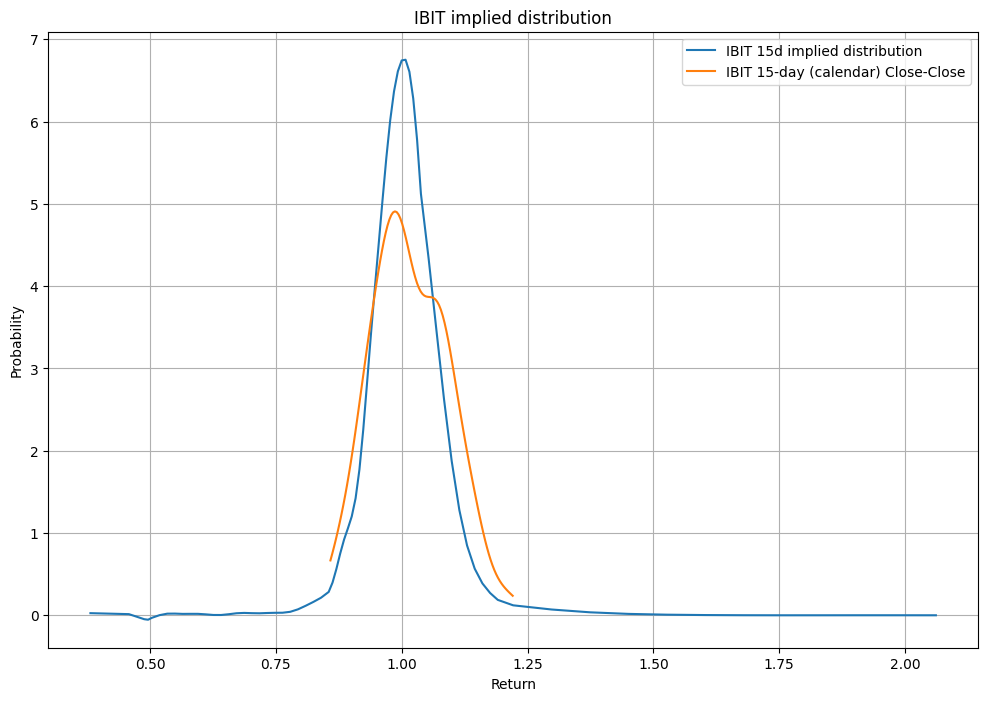

In [5]:
ticker = 'IBIT'
dte = 15
chain = OptionMethods.get_current_chain(session, ticker, dte=dte)
rfr = Auxiliary.get_rfr()
fig, chain = OptionMethods.plot_implied_dist(chain, dte, rfr, symbol=ticker, gaussian_sigma=2)
fig = Historical.plot_return_distribution(ticker=ticker, period=dte, mode='CC', time_method='calendar', start_date='2025-01-01', end_date='2025-08-07', fig=fig)

plt.show()

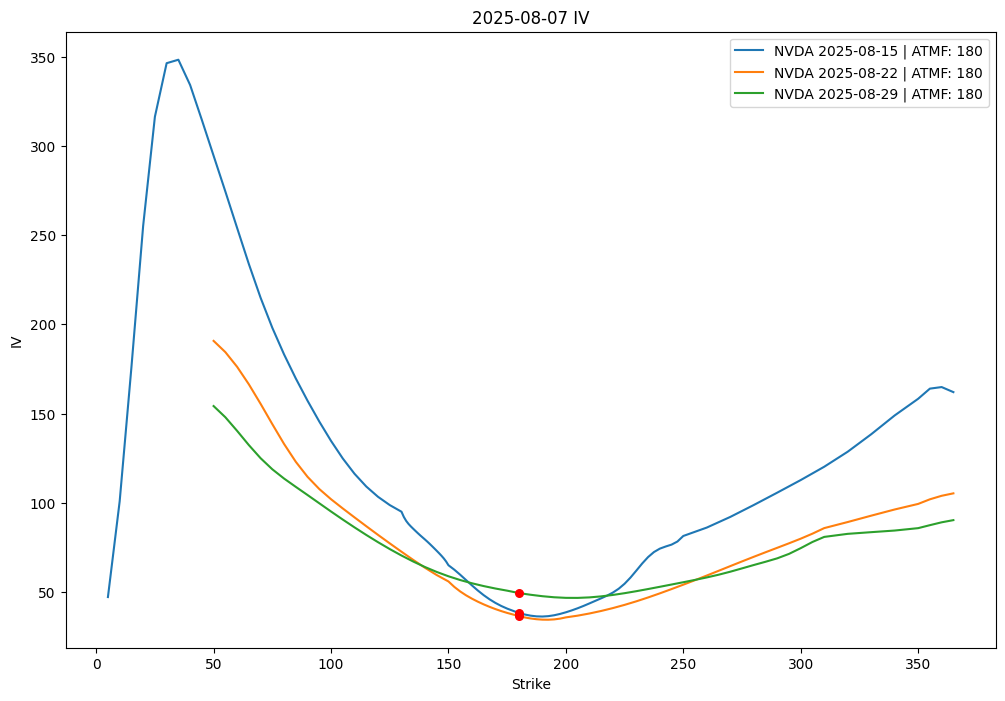

In [6]:
fig = None
for exp in ['2025-08-15', '2025-08-22', '2025-08-29']:
    fig = OptionMethods.plot_iv(session, 'NVDA', exp=pd.to_datetime(exp), fig = fig)
plt.show()

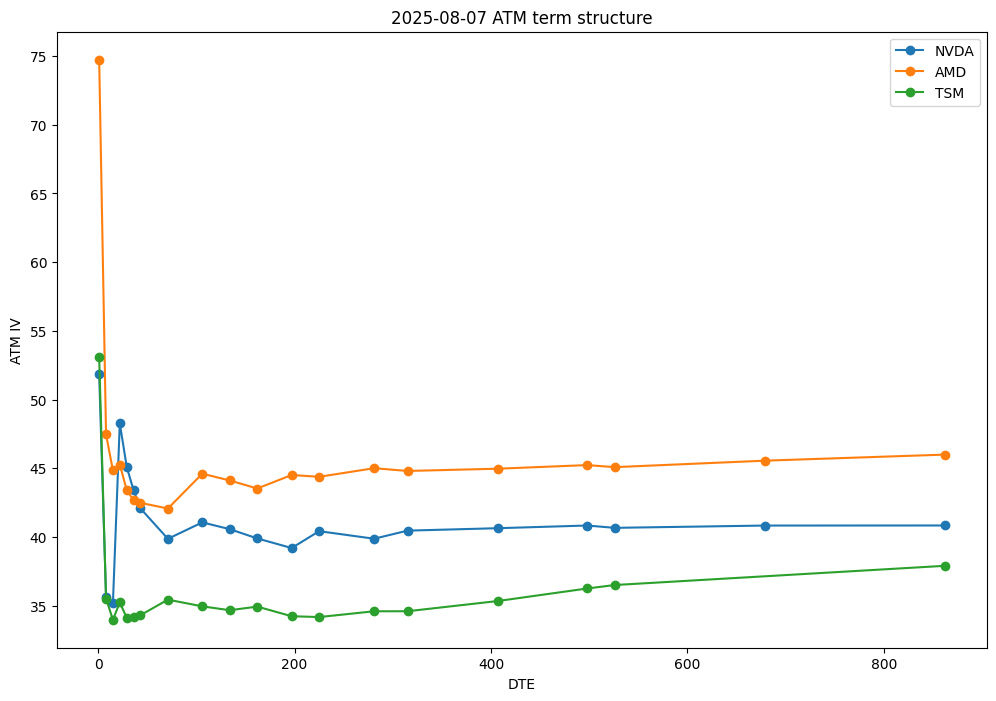

In [7]:
rfr = Auxiliary.get_rfr()
fig = None
for ticker in ['NVDA', 'AMD', 'TSM']:
    fig = OptionMethods.atm_vol_surface(session, ticker, rfr=rfr, fig=fig)
plt.show()